In [1]:
# Author : Nishant Banjade
# Support vector machine

import numpy as np

class SVM():

    def __init__(self, learning_rate=0.001, lambda_value = 0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.lambda_value = lambda_value
        self.iterations = iterations
        # initially assign weight and bais as None
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape      # X.shape = (row, column)
        y_temp = np.where(y<=0, -1, 1)       # y (-1 , 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for i in range(self.iterations):
            # for individual data points, we use nested loop 
            for idx, x_i in enumerate(X):
                condition = y_temp[idx] * (np.dot(x_i, self.w) - self.b) >= 1

                if condition:
                    self.w -= self.learning_rate * (2*self.lambda_value * self.w)
                else:
                    self.w -= self.learning_rate *(2*self.lambda_value * self.w - np.dot(x_i, y_temp[idx]))


    def predict(self, X):
       prediction = np.dot(X, self.w)-self.b
       return np.sign(prediction)


[0.61505381 0.16095805] 0


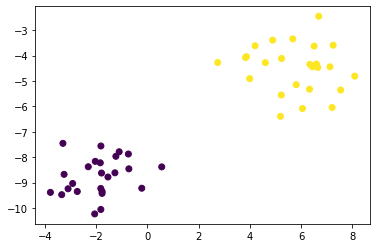

In [28]:
# Testing with datasets

from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples = 50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

y = np.where(y==0, -1, 1)

svm = SVM()
svm.fit(X,y)
#prediction = svm.predict(X)

print(svm.w, svm.b)
plt.scatter(X[:, 0], X[:, 1], marker = "o", c = y)

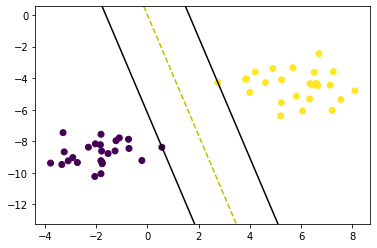

In [27]:
# visualize the svm 
def visualize_svm():

    def hyperplane_value(x, w, b, offset):
        return (-w[0] * x+b+offset)/w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    plt.scatter(X[:, 0], X[:, 1], marker = "o", c = y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = hyperplane_value(x0_1, svm.w, svm.b,0)
    x1_2 = hyperplane_value(x0_2, svm.w, svm.b, 0)

    x1_1_m = hyperplane_value(x0_1, svm.w, svm.b, -1)
    x1_2_m = hyperplane_value(x0_2, svm.w, svm.b, -1)


    x1_1_p =hyperplane_value(x0_1, svm.w, svm.b, 1)
    x1_2_p = hyperplane_value(x0_2, svm.w, svm.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim(x1_min-3, x1_max+3)
    plt.show()
visualize_svm()


In [35]:
X[:,0]

array([ 7.12731332,  6.68873898, -1.1004791 ,  3.99337867, -1.8171622 ,
       -2.05521901,  4.20397723, -0.21804625,  5.19327641, -1.83682056,
        7.54287406,  4.88954545, -1.76558632,  5.22597752,  6.64886376,
        8.09408178,  6.32916529,  5.80670214,  5.67381136,  7.20870152,
       -3.25014567, -1.22856371, -3.29446134, -1.81294631, -1.53809058,
       -3.78288052, -2.73473836,  0.56085542, -0.74123127, -1.78948268,
        6.50753753,  4.60302933, -1.26561532, -0.72123914,  3.83024448,
       -3.34179681,  6.05297048, -2.91411681,  3.86649969,  6.44492377,
       -1.81467949, -1.76772086,  2.74565323,  5.23730283,  6.34072331,
       -2.30635421, -3.09442079,  6.59620916,  7.24901124, -2.03285195])